In [ ]:
# Section 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
sns.set(style="whitegrid")

# Section 2: Load Dataset
df = pd.read_csv("Student_performance_data .csv")  # update path as needed
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


5>Exploratory data Analysis

Univariate analysis

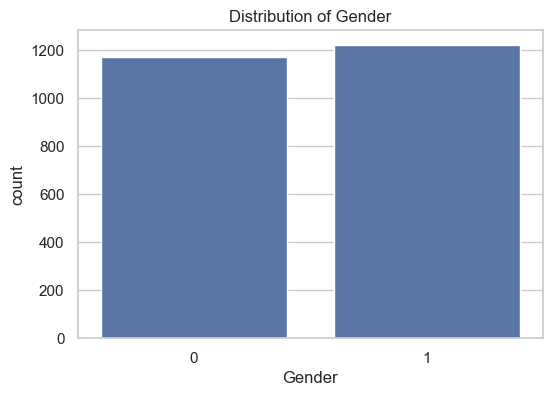

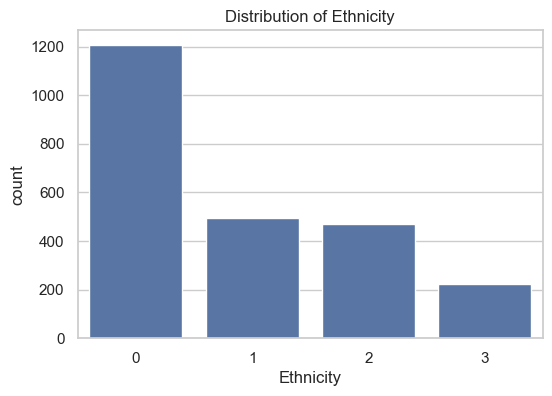

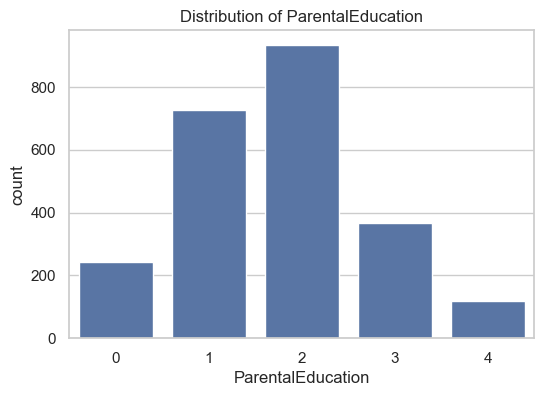

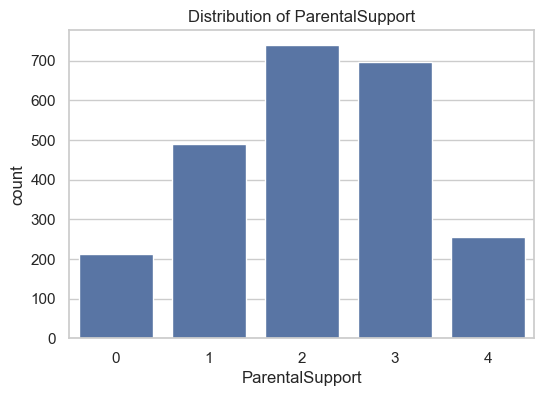

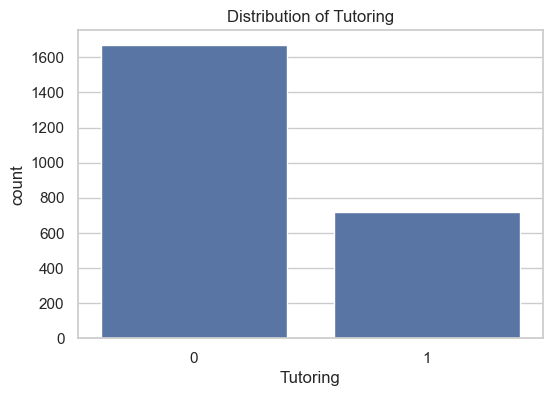

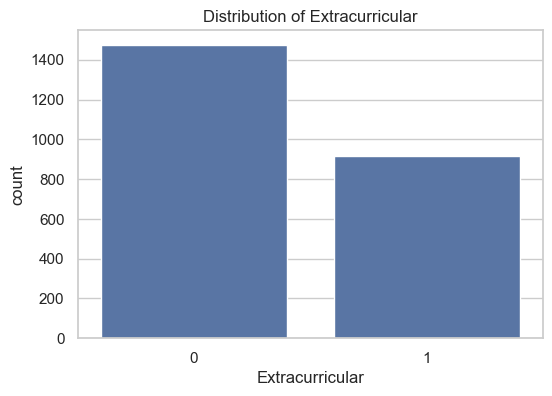

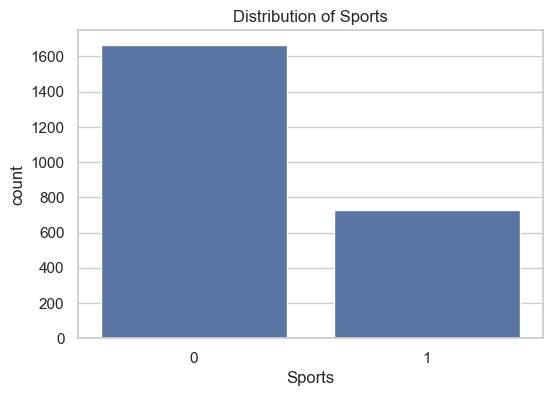

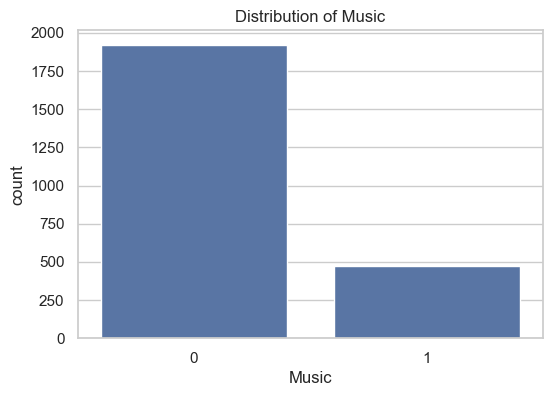

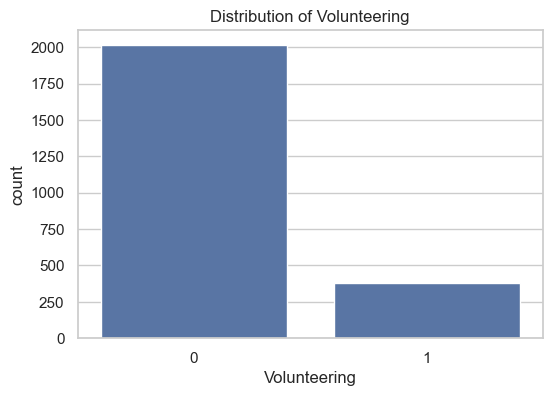

In [ ]:
# Categorical variables distribution
categorical_cols = ['Gender', 'Ethnicity', 'ParentalEducation', 'ParentalSupport', 
                    'Tutoring', 'Extracurricular', 'Sports', 'Music', 'Volunteering']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

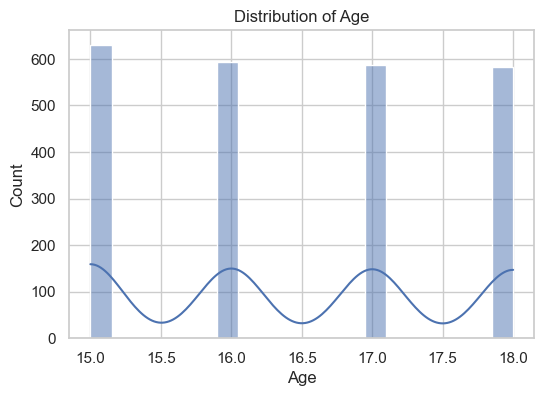

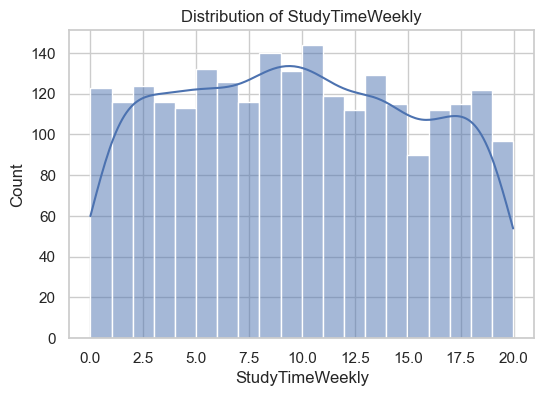

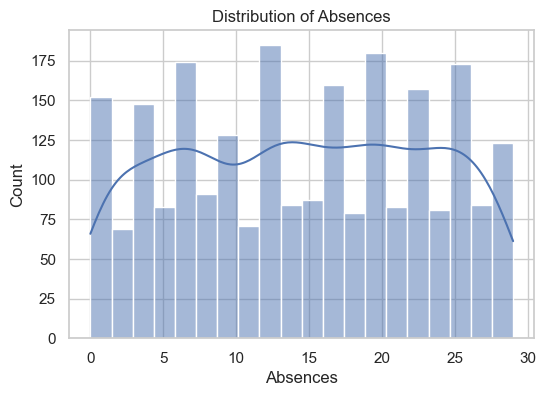

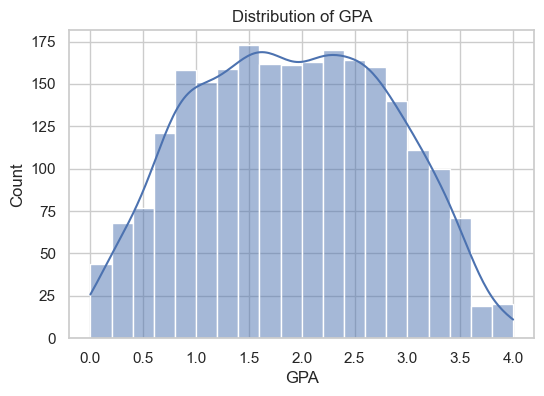

In [9]:
# Numerical variables distribution
numerical_cols = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']

df[numerical_cols].describe()

for col in numerical_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()